<a href="https://colab.research.google.com/github/ayten21/Data-Analysis/blob/main/UberTripsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('uber-raw-data-sep14.csv')
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data



,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [ ]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
data['Date/Time'].describe

<bound method NDFrame.describe of 0         2014-09-01 00:01:00
1         2014-09-01 00:01:00
2         2014-09-01 00:03:00
3         2014-09-01 00:06:00
4         2014-09-01 00:11:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 1028136, dtype: datetime64[ns]>

In [ ]:
data['Day'] = data['Date/Time'].apply(lambda x: x.day)

In [ ]:
data['Weekday'] = data['Date/Time'].apply(lambda x: x.weekday())

In [ ]:
data['Month'] = data['Date/Time'].apply(lambda x: x.month)

In [ ]:
data['Hour'] = data['Date/Time'].apply(lambda x: x.hour)
data['Year'] = data['Date/Time'].apply(lambda x: x.year)

In [ ]:
data

,Date/Time,Lat,Lon,Base,Day,Weekday,Month,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,9,0
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,9,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,9,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,9,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,9,22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


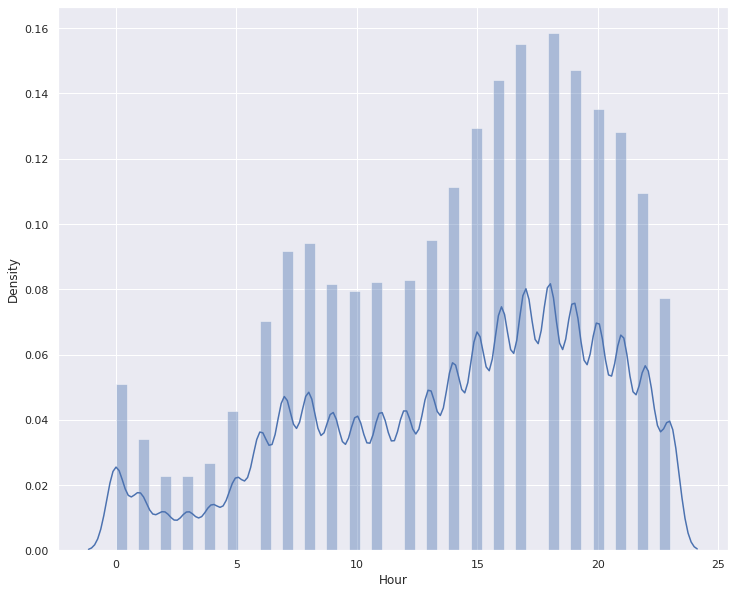

In [ ]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data['Hour'])

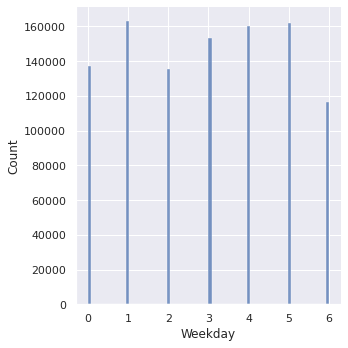

In [ ]:
sns.displot(data['Weekday'])

In [ ]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))

In [ ]:
df

Weekday  Hour
0        0       1885
         1       1201
         2        977
         3       1780
         4       2479
                 ... 
6        19      6430
         20      5930
         21      5164
         22      4115
         23      2326
Length: 168, dtype: int64

In [ ]:
df = df.unstack()

In [ ]:
df

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,5358,5461,5415,6245,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,6517,6071,5987,7079,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,4929,5027,5011,5833,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,5655,5723,5641,6368,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,5355,5230,5388,6238,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,5132,5801,6114,7049,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,4688,5508,5637,6230,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


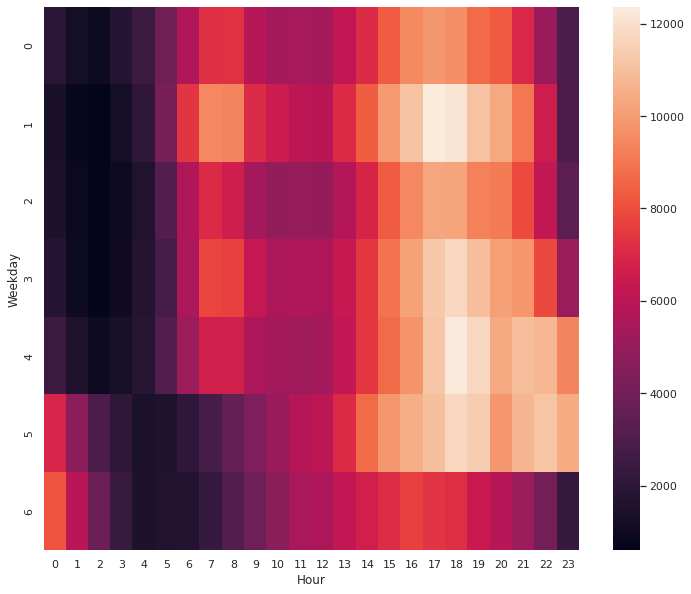

In [ ]:
sns.heatmap(df, annot = False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


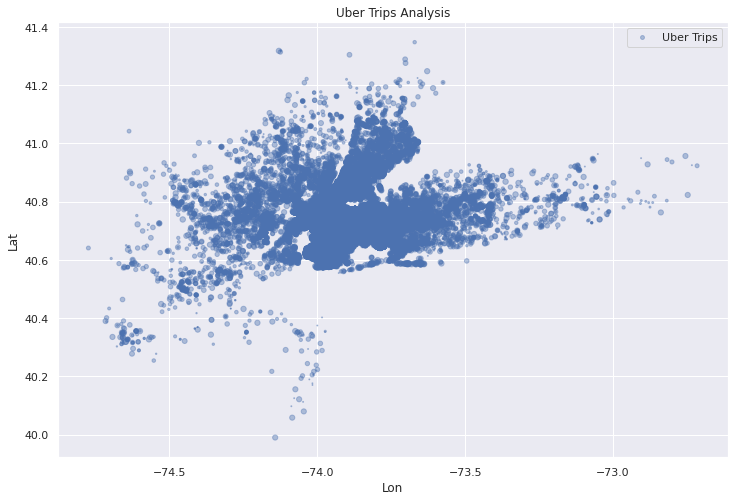

In [ ]:
data.plot(kind = 'scatter' , x = 'Lon', y = 'Lat', alpha = 0.4, s=data['Day'], label = "Uber Trips", figsize = (12,8), cmap=plt.get_cmap('jet'))
plt.title('Uber Trips Analysis')
plt.legend()
plt.show()